## import packages

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
# func
def freq_dis( column ):
    '''returns a frequency distribution of a column.'''
    d = {}
    for i in list(column):
        if i in d.keys(): d[i] += 1
        else: d[i] = 1
    # sort by value.
    d = dict( sorted(d.items(), key=lambda x: x[1] ))
    return d

## load dataset from provided file, in the correct excel sheet

In [22]:
df = pd.read_excel("./KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="CustomerDemographic", header=1)
df.head()

/var/folders/0r/13xz5g6j45589319bn94k47w0000gn/T/ipykernel_37247/613519421.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.read_excel("./KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="CustomerDemographic", header=1)


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [49]:
# check 'past_3_years_bike_related_purchases' for data consistency and accuracy.
past_3_years = df['past_3_years_bike_related_purchases']
print( f"frequency distribution:\n{freq_dis(past_3_years)}")
print( f"\ndescribe:\n{past_3_years.describe()}")

frequency distribution:
{92: 24, 85: 27, 95: 27, 86: 27, 8: 28, 61: 29, 58: 29, 45: 29, 3: 30, 21: 30, 28: 31, 75: 32, 52: 32, 43: 33, 5: 33, 26: 33, 84: 33, 56: 34, 31: 34, 78: 34, 57: 35, 74: 35, 55: 35, 87: 35, 1: 35, 7: 35, 94: 36, 41: 36, 91: 37, 62: 37, 4: 37, 88: 37, 50: 37, 15: 37, 65: 38, 77: 38, 36: 38, 89: 38, 66: 38, 0: 38, 79: 39, 46: 39, 24: 39, 54: 39, 9: 39, 39: 39, 40: 40, 63: 40, 60: 40, 14: 40, 49: 41, 76: 41, 64: 41, 30: 41, 32: 41, 42: 41, 70: 41, 29: 41, 97: 42, 12: 42, 18: 42, 17: 42, 51: 42, 68: 42, 25: 42, 90: 42, 81: 43, 35: 43, 22: 43, 69: 43, 83: 43, 10: 43, 71: 43, 99: 44, 59: 44, 82: 44, 34: 44, 6: 45, 47: 45, 93: 46, 48: 46, 23: 46, 96: 46, 98: 47, 13: 47, 72: 48, 73: 48, 11: 48, 27: 48, 33: 49, 38: 49, 37: 49, 44: 49, 80: 49, 53: 49, 2: 50, 67: 54, 20: 54, 16: 56, 19: 56}

describe:
count    4000.000000
mean       48.890000
std        28.715005
min         0.000000
25%        24.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: 

In [28]:
# check the gender column for data consistency
d = {}
for i in list(df['gender']):
    if i in d.keys():
        d[i] += 1
    else:
        d[i] = 1
print(d)

{'F': 1, 'Male': 1872, 'Female': 2037, 'U': 88, 'Femal': 1, 'M': 1}


In [27]:
print(f"dataset shape: {df.shape}\n")
print(df.columns)

dataset shape: (4000, 13)

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')


## check for missing values in the columns.

In [4]:
# identify missing values columns using isnull()
# df.isna().sum()
df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                339
owns_car                                 0
tenure                                  87
dtype: int64

In [5]:
# check for missing values using isna()
df.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                339
owns_car                                 0
tenure                                  87
dtype: int64

In [6]:
# check unique values in features with a lot oh null data
[ x for x in [ str(i).lower() == 'n/a' for i in df['default'] ] if x == True ]

[]

## Identify outliers in the data

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')


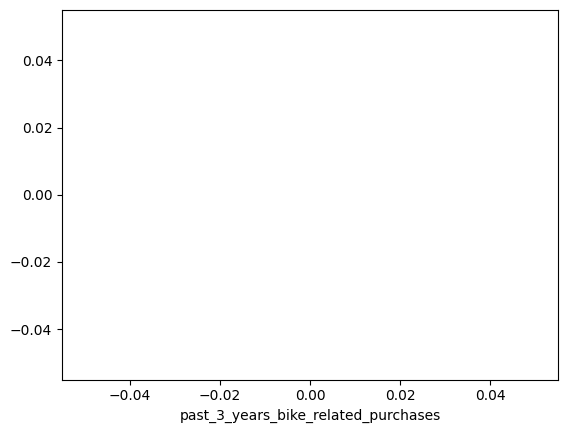

In [7]:
# check for outliers.
print( df.columns )
sns.scatterplot (data=df, x="past_3_years_bike_related_purchases")
# df.boxplot(column="postcode") # postcode, property_valuation
plt.show()

## validate data types

In [9]:
df.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
default                                        object
owns_car                                       object
tenure                                        float64
dtype: object

## check for duplicate rows.

In [8]:
# from the result, there are no duplicate data samples.
df[df.duplicated()]
# df[df.duplicated(['customer_id'])]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure


## check data ranges

In [9]:
# use describe method to check for data range. will only check numerical values.
df.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


## check for consistency.

In [ ]:
df.value_counts()

In [11]:
df.corr()

/var/folders/0r/13xz5g6j45589319bn94k47w0000gn/T/ipykernel_37247/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,customer_id,past_3_years_bike_related_purchases,tenure
customer_id,1.000000,-0.002529,-0.019947
past_3_years_bike_related_purchases,-0.002529,1.000000,-0.009508
tenure,-0.019947,-0.009508,1.000000


In [ ]:
# 